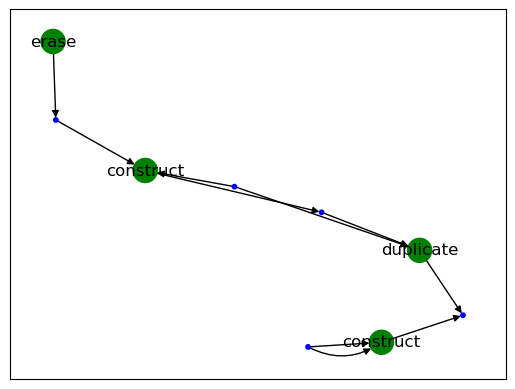

In [13]:
from src import nx_hif
from src.nx_hif.test_dpo import *
import networkx as nx

def inet_draw(inet):
    inet = nx.MultiDiGraph(inet)
    inet.remove_nodes_from(list(nx.isolates(inet)))
    # https://docs.rapids.ai/api/cugraph/stable/api_docs/api/cugraph/cugraph.force_atlas2/
    # note that this layout can be run on the GPU with nx-cugraph
    pos = nx.drawing.layout.forceatlas2_layout(inet)
    nx.draw_networkx(
        inet,
        pos=pos,
        labels={
            n: inet.nodes[n].get("tag", "") for n in inet.nodes},
        node_size=[
            10 if inet.nodes[n]["bipartite"] == 0
            else 300 for n in inet.nodes],
        node_color=[
            "blue" if inet.nodes[n]["bipartite"] == 0
            else "green" for n in inet.nodes],
        connectionstyle=["arc3,rad=-0.00", "arc3,rad=0.3"],
        )


inet = inet_franchu()

L = inet_condup_rule_L()
R = inet_condup_rule_R()
K = dpo_invariant(inet, L, R)
# inet_draw(L)
# inet_draw(R)
# inet_draw(K)
inet_draw(inet)


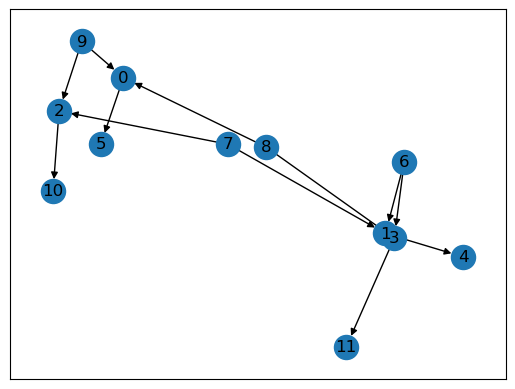

In [14]:
nx.draw_networkx(R[0])

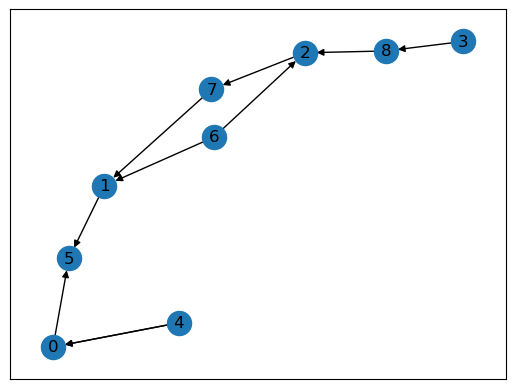

In [15]:
nx.draw_networkx(inet)

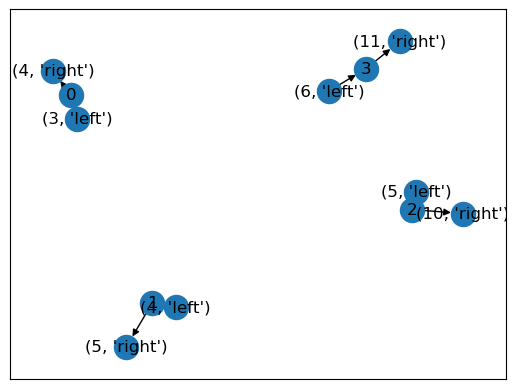

In [16]:
nx.draw_networkx(K)

addin 10 4 0 0 1 {}
addin 9 4 0 0 2 {}
addin 11 6 0 0 1 {}
addin 12 7 0 0 2 {}


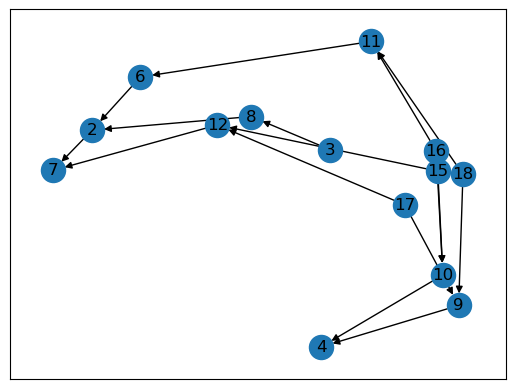

In [17]:
C = dpo_rewrite(inet, L, R, K)
nx.draw_networkx(C)
# print(C.in_edges(9, keys=True))
# print(C.out_edges(9, keys=True))

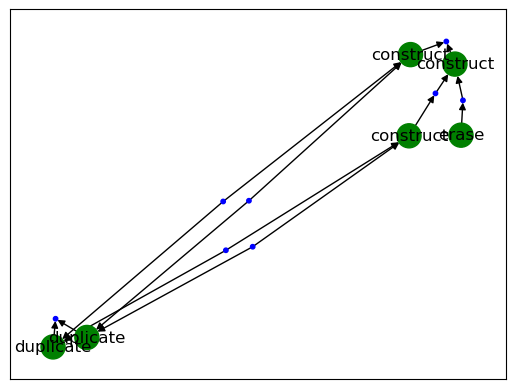

In [18]:
inet_draw(C)

[(17, 9, 0), (18, 9, 0)]
[(9, 4, 2)]


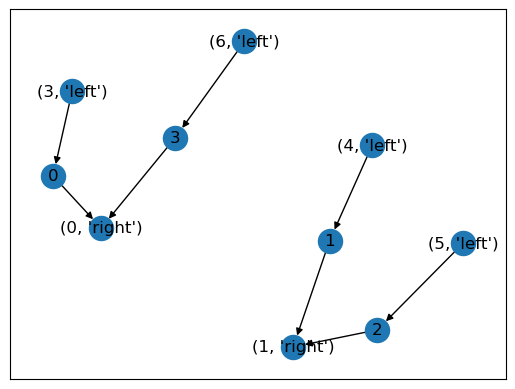

In [19]:
L = inet_concon_rule_L()
R = inet_concon_rule_R()
K = dpo_invariant(C, L, R)
print(C.in_edges(9, keys=True))
print(C.out_edges(9, keys=True))
nx.draw_networkx(K)

{0: 0, 4: 2, 9: 1}
8 1 {}
0 1 {}
{0: 0, 4: 2, 9: 1}
1 0 {'tag': 3}
0 2 {}
{0: 0, 4: 2, 9: 1}
0 0 {'tag': 2}
9 2 {}
{9: 0, 4: 2, 0: 1}
0 0 {'tag': 2}
9 2 {}
{9: 0, 4: 2, 0: 1}
8 1 {}
0 1 {}
{9: 0, 4: 2, 0: 1}
1 0 {'tag': 3}
0 2 {}


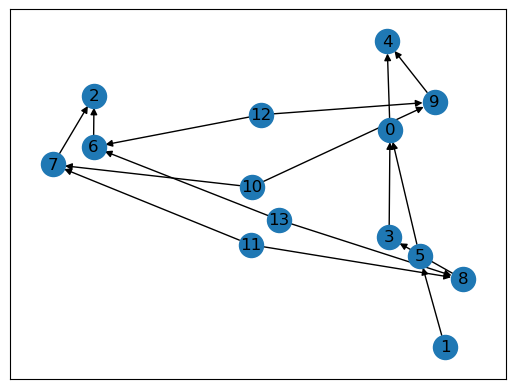

In [20]:
C = nx.convert_node_labels_to_integers(C)
nx.draw_networkx(C)
C = dpo_rewrite(C, L, R, K)

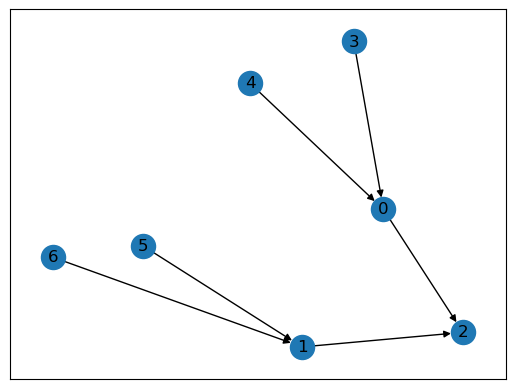

In [21]:
nx.draw_networkx(L[0])

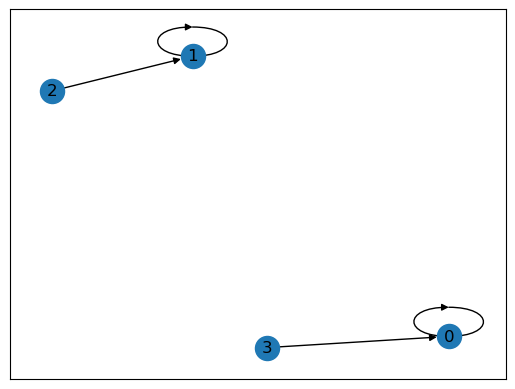

In [22]:
nx.draw_networkx(R[1])

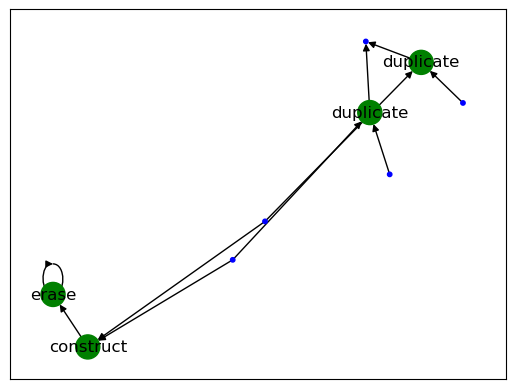

In [27]:
inet_draw(C)

In [24]:

# L = inet_concon_rule_L()
# RB = inet_concon_rule_R()
# K = dpo_invariant(L, RB)
# G = dpo_rewrite(G, L, RB, K)